<a href="https://colab.research.google.com/github/m10k1/gemini_cookbook/blob/main/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini API: Geminiモデルガイド

このガイドで行う学ぶ内容

* Google GenAI SDKのセットアップ：PyPIからSDKをインストールし、APIキーを使って初期化。
* モデルの選択と使用：gemini-2.5-flashなどのモデルを選び、テキストプロンプトに応答させる。
* プロンプト生成：generate_contentメソッドで応答を生成し、.textプロパティで結果を取得。
* トークンのカウント：送信前にcount_tokensでトークン数を確認。
* システム命令の設定：モデルの振る舞いを制御するための命令を設定。
* 安全フィルターの構成：出力の安全性を確保。
* マルチターンチャット：複数のやり取りを通じた会話の実装。
* 関数呼び出し：モデルが関数を呼び出す機能の利用。
* 非同期リクエストとコンテンツストリーム：複数のリクエストを並行処理。
* ファイルアップロードとコンテキストキャッシュ：外部ファイルの利用と履歴の保持。
* テキスト埋め込み生成：意味的な類似性を扱うためのベクトル生成。

## セットアップ

### SDKのインストール

```
pip install -U google-genai
```

In [55]:
!pip install -U -q google-genai

In [56]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GOOGLE_API_KEY')

from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

## モデルの選択

このガイドで使用するモデルを選択する。
リストから選ぶか、手動でモデル名を入力する。
2.5のような一部のモデルは思考型モデルであるため、反応に若干時間がかかる。

Gemini モデル概要につては、この[ドキュメント](https://ai.google.dev/gemini-api/docs/models/gemini)を確認




In [57]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash-lite-preview-09-2025", "gemini-2.5-flash", "gemini-2.5-flash-preview-09-2025", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}


## テキストプロンプトの送信

プロンプトに対する応答を生成するには generate_content メソッドを使用する。

generate_content に直接テキストを渡し、.text プロパティを使用して応答のテキスト内容を取得できる。
.text フィールドは、出力に 1 つの部分しかない場合に
機能することに注意。



In [58]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="太陽系で一番大きな惑星はなんですか"
)

Markdown(response.text)

太陽系で一番大きな惑星は**木星（もくせい）**です。

## トークンを数える

トークンはGeminiモデルへの基本的な入力。
Gemini APIにリクエストを送信する前に、count_tokensメソッドを使用して入力トークンの数を計算することができる。


In [59]:
respoinse = client.models.count_tokens(
    model = MODEL_ID,
    contents = "アフリカで一番標高の高い山は何ですか",
)

print(response)


sdk_http_response=HttpResponse(
  headers=<dict len=10>
) candidates=[Candidate(
  content=Content(
    parts=[
      Part(
        text='太陽系で一番大きな惑星は**木星（もくせい）**です。'
      ),
    ],
    role='model'
  ),
  finish_reason=<FinishReason.STOP: 'STOP'>,
  index=0
)] create_time=None model_version='gemini-2.5-flash' prompt_feedback=None response_id='yuHqaNXSMOCUmtkPk4iiyQI' usage_metadata=GenerateContentResponseUsageMetadata(
  candidates_token_count=18,
  prompt_token_count=10,
  prompt_tokens_details=[
    ModalityTokenCount(
      modality=<MediaModality.TEXT: 'TEXT'>,
      token_count=10
    ),
  ],
  thoughts_token_count=30,
  total_token_count=58
) automatic_function_calling_history=[] parsed=None


## マルチモーダルプロンプトを送信する

マルチモーダルなプロンプトをサポートするGeminiモデルを使用する。
プロンプトのリクエストにテキスト、PDF文書、画像、音声、動画を含めることができ、テキストまたはコードによる応答を得ることができる。

この最初の例では、指定されたURLから画像をダウンロードし、
それをバイトストリームとして保存し、それらのバイトをjetpack.pngという名前のローカルファイルに書き込む。


In [60]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

# URLの画像データをダウンロード
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)



1567837

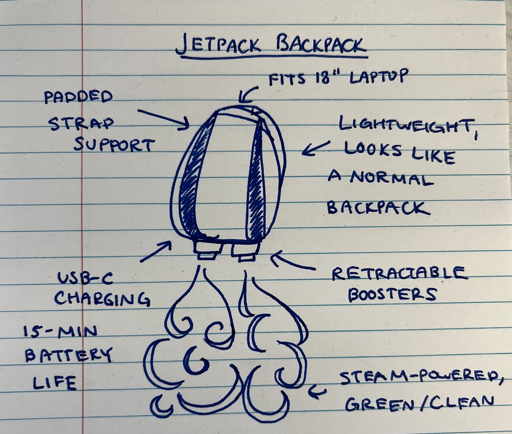

はい、この画像に基づいた短くて魅力的なブログ記事です！

---

## 空飛ぶ夢を現実に！『ジェットパック・バックパック』が未来の通勤を変える？

毎日の通勤ラッシュ、うんざりしていませんか？ もし、あなたのリュックサックが空を飛べるとしたら？ そんな夢のようなアイデアが、ついに形になるかもしれません！

今回ご紹介するのは、驚きのコンセプトデザイン、『**ジェットパック・バックパック**』！

### 一見、普通のバックパック。その実態は…？

このスケッチを見てください。一見すると、ごく普通のスタイリッシュなバックパックですよね。
*   **18インチのノートパソコンも収納可能**な大容量。
*   **軽量設計**で、肩への負担を軽減する**パッド入りストラップサポート**付き。
*   普段使いに全く違和感のないデザイン。

### しかし、その真の姿は「空飛ぶ移動手段」！

このバックパックの底部には、なんと**格納式のブースター**が隠されています！ そして、そこから噴出するのは、まさかの「**蒸気**」！

そう、このジェットパックは**蒸気動力**で動く、**環境に優しくクリーンな未来の移動手段**なのです。

### 未来のフライトはすぐそこに！

*   充電は**USB-C**に対応。
*   一度の充電で**約15分間のフライトが可能**だとか！

想像してみてください。渋滞を横目に、空中をスイスイ移動するあなたの姿を！
この画期的な『ジェットパック・バックパック』が、私たちの日常をどれほど変えてくれるのか、今から楽しみでなりません。

あなたはこの未来のアイテム、どう思いますか？ コメントで教えてくださいね！

---

In [61]:
from IPython.display import display, Markdown

image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents = [
        image,
        "この写真に基づいて短くて魅力的なブログ記事を書いて"
    ]
)

display(image)
Markdown(response.text)

## モデルパラメータを設定する

モデルがどのようにレスポンスを生成するかを制御するために、モデルに送信する各コールにパラメータ値を含めることができる。


In [62]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents = "インターネットの仕組みを教えてくれ。でも、私がキーキー鳴るおもちゃしか理解できない子犬だと思ってくれ。",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k =20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

わん！わん！わん！よし、わかった！キーキー鳴るおもちゃしか理解できない、ちっちゃなモフモフの子犬ちゃん、だね！

じゃあ、インターネットって、こんな感じだよ！

---

**インターネットって、世界中のワンちゃんたちが遊べる、とーっても大きな「おもちゃ公園」なんだ！**

1.  **君と、他のワンちゃんたち（パソコンやスマホ）:**
    *   君は、お気に入りのキーキー鳴るおもちゃを持ってる、ちっちゃなワンちゃんだね。
    *   世界中には、他にもたくさんのワンちゃんがいるんだ。みんな、それぞれ自分のおもちゃ（情報）を持ってるよ。

2.  **キーキー鳴るおもちゃ（情報）を投げる！:**
    *   君が「ワン！」って言いたいこと（情報）があるとするね。
    *   その「ワン！」を、君の持ってるキーキー鳴るおもちゃに込めるんだ。
    *   そして、そのおもちゃを「えいっ！」って投げるんだよ！

3.  **見えないヒモや道（ケーブルやWi-Fi）:**
    *   投げたおもちゃは、どこか遠くのワンちゃんに届くように、見えないヒモや、地面に描かれた道の上をコロコロ転がっていくんだ。
    *   このヒモや道は、君の家から、世界中のワンちゃんの家まで繋がってるんだよ！

4.  **賢い大きなワンちゃん（ルーター）:**
    *   道にはね、とっても賢くて、道案内が得意な「大きなワンちゃん」が何匹もいるんだ。
    *   君が投げたおもちゃが来ると、その大きなワンちゃんは「これは、あっちのワンちゃんのところに行くんだな！」って、ちゃんと正しい道にポンって乗せてくれるんだよ。迷子にならないようにね！

5.  **おもちゃがいっぱい入った大きな箱（サーバー）:**
    *   中にはね、とーってもたくさんのキーキー鳴るおもちゃ（情報）を、大きな箱にいっぱい持ってるワンちゃんもいるんだ。
    *   例えば、「ネコちゃんの面白い動画」っていうおもちゃが欲しかったら、その箱を持ってるワンちゃんに「ちょうだい！」って言うと、そのおもちゃをポンって投げてくれるんだよ。
    *   それが「ウェブサイト」とか「動画」とか、君が見てるものなんだ。

6.  **お友達のワンちゃんがキャッチ！（受信）:**
    *   賢い大きなワンちゃんたちが道案内してくれたおかげで、君が投げたおもちゃは、ちゃんと遠くのお友達のワンちゃんのところに届くんだ！
    *   お友達のワンちゃんは、そのおもちゃを「わーい！」ってキャッチして、君の「ワン！」を聞いてくれるんだよ。

**まとめるとね、**

インターネットっていうのは、
**君がキーキー鳴るおもちゃ（情報）を「えいっ！」って投げると、**
**見えないヒモや道をコロコロ転がって、**
**賢い大きなワンちゃん（ルーター）が道案内してくれて、**
**遠くにいるお友達のワンちゃんや、おもちゃがいっぱい入った箱を持ってるワンちゃん（サーバー）に届く、**
**世界中のワンちゃんたちが、おもちゃを投げ合って遊べる、とーっても大きな公園なんだ！**

これで、君も世界中のワンちゃんと「ワン！ワン！」って遊べるようになったね！キーキー！

## 安全フィルターを設定する

Gemini APIは、特定のタイプのコンテンツを制限または許可するために、複数のフィルタカテゴリにわたって調整できるセーフティフィルタを提供する。これらのフィルタを使用して、ユースケースに適したものを調整することができる。


In [63]:
prompt = """
暗闇の中で足の指を擦りむいた後、私が宇宙に向かって言うかもしれない2つの無礼な言葉のリストを書きなさい。
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

暗闇で足の指を擦りむいた後、宇宙に向かって発するかもしれない2つの無礼な言葉のリストです。

1.  **「くそっ！」(Kuso!)**
    *   直接的で、強い痛みや苛立ちを感じたときに自然に出る言葉です。「Damn it!」や「Shit!」に相当します。

2.  **「このクソッタレめ！」(Kono kusottare me!)**
    *   宇宙全体に向かって「この野郎！」「このろくでなし！」といった非難を込めた表現です。「クソッタレ」は非常に強い侮蔑の言葉で、「め」はその対象に対する強い軽蔑や敵意を表す接尾語です。

## 複数ターンのチャット

Gemini APIを使えば、複数のターンにまたがる自由形式の会話が可能になる。
次に、便利なコーディングアシスタントを設定する：

In [64]:
system_instruction = """
あなたはソフトウェア開発者の専門家であり、有益なコーディングアシスタントです。
どんなプログラミング言語の品質の高いコードを書くことができます
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

response = chat.send_message("指定された年がうるう年かどうかを判断する関数をかいて")

Markdown(response.text)

指定された年がうるう年かどうかを判断する関数を、いくつかの主要なプログラミング言語でご紹介します。

まず、うるう年の判定ルールを明確にしておきましょう。

---
### うるう年の判定ルール

グレゴリオ暦におけるうるう年は、以下の条件で判定されます。

1.  **4で割り切れる年はうるう年である。**
2.  **ただし、100で割り切れる年はうるう年ではない。**
3.  **さらに、400で割り切れる年はうるう年である。**

これを論理式で表現すると、以下のようになります。
`(年 % 4 == 0 AND 年 % 100 != 0) OR (年 % 400 == 0)`

---

以下に、このルールを実装した関数を各言語で示します。

### 1. Python

```python
def is_leap_year(year: int) -> bool:
    """
    指定された年がうるう年であるかどうかを判定します。

    Args:
        year (int): 判定する西暦年。

    Returns:
        bool: うるう年であればTrue、そうでなければFalse。
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# テストケース
print(f"2000年はうるう年か？ {is_leap_year(2000)}") # True (400で割り切れる)
print(f"1900年はうるう年か？ {is_leap_year(1900)}") # False (100で割り切れるが400で割り切れない)
print(f"2024年はうるう年か？ {is_leap_year(2024)}") # True (4で割り切れる)
print(f"2023年はうるう年か？ {is_leap_year(2023)}") # False (4で割り切れない)
print(f"1600年はうるう年か？ {is_leap_year(1600)}") # True (400で割り切れる)
```

### 2. JavaScript

```javascript
/**
 * 指定された年がうるう年であるかどうかを判定します。
 *
 * @param {number} year - 判定する西暦年。
 * @returns {boolean} うるう年であればtrue、そうでなければfalse。
 */
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// テストケース
console.log(`2000年はうるう年か？ ${isLeapYear(2000)}`); // true
console.log(`1900年はうるう年か？ ${isLeapYear(1900)}`); // false
console.log(`2024年はうるう年か？ ${isLeapYear(2024)}`); // true
console.log(`2023年はうるう年か？ ${isLeapYear(2023)}`); // false
console.log(`1600年はうるう年か？ ${isLeapYear(1600)}`); // true
```

### 3. C#

```csharp
using System;

public class DateUtils
{
    /// <summary>
    /// 指定された年がうるう年であるかどうかを判定します。
    /// </summary>
    /// <param name="year">判定する西暦年。</param>
    /// <returns>うるう年であればtrue、そうでなければfalse。</returns>
    public static bool IsLeapYear(int year)
    {
        // うるう年の判定ロジック
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);

        // .NETにはDateTime.IsLeapYearという標準メソッドが用意されており、
        // 実際にはこちらを使用するのが最も推奨されます。
        // return DateTime.IsLeapYear(year);
    }

    // テストケース
    public static void Main(string[] args)
    {
        Console.WriteLine($"2000年はうるう年か？ {IsLeapYear(2000)}"); // True
        Console.WriteLine($"1900年はうるう年か？ {IsLeapYear(1900)}"); // False
        Console.WriteLine($"2024年はうるう年か？ {IsLeapYear(2024)}"); // True
        Console.WriteLine($"2023年はうるう年か？ {IsLeapYear(2023)}"); // False
        Console.WriteLine($"1600年はうるう年か？ {IsLeapYear(1600)}"); // True
    }
}
```

### 4. Java

```java
public class DateUtils {

    /**
     * 指定された年がうるう年であるかどうかを判定します。
     *
     * @param year 判定する西暦年。
     * @return うるう年であればtrue、そうでなければfalse。
     */
    public static boolean isLeapYear(int year) {
        // うるう年の判定ロジック
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);

        // Java 8以降では、java.time.YearクラスのisLeap()メソッドを使用するのが推奨されます。
        // return java.time.Year.of(year).isLeap();

        // 古いAPIでは、java.util.GregorianCalendarのisLeapYear()も利用できます。
        // return new java.util.GregorianCalendar().isLeapYear(year);
    }

    // テストケース
    public static void main(String[] args) {
        System.out.println("2000年はうるう年か？ " + isLeapYear(2000)); // true
        System.out.println("1900年はうるう年か？ " + isLeapYear(1900)); // false
        System.out.println("2024年はうるう年か？ " + isLeapYear(2024)); // true
        System.out.println("2023年はうるう年か？ " + isLeapYear(2023)); // false
        System.out.println("1600年はうるう年か？ " + isLeapYear(1600)); // true
    }
}
```

### 5. Go

```go
package main

import "fmt"

// IsLeapYear は指定された年がうるう年であるかどうかを判定します。
//
// うるう年のルール:
// 1. 4で割り切れる年はうるう年である。
// 2. ただし、100で割り切れる年はうるう年ではない。
// 3. ただし、400で割り切れる年はうるう年である。
func IsLeapYear(year int) bool {
	return (year%4 == 0 && year%100 != 0) || (year%400 == 0)
}

// テストケース
func main() {
	fmt.Printf("2000年はうるう年か？ %v\n", IsLeapYear(2000)) // true
	fmt.Printf("1900年はうるう年か？ %v\n", IsLeapYear(1900)) // false
	fmt.Printf("2024年はうるう年か？ %v\n", IsLeapYear(2024)) // true
	fmt.Printf("2023年はうるう年か？ %v\n", IsLeapYear(2023)) // false
	fmt.Printf("1600年はうるう年か？ %v\n", IsLeapYear(1600)) // true
}
```

---

**補足事項:**

*   多くのプログラミング言語の標準ライブラリ（特に日付・時刻関連のライブラリ）には、うるう年を判定するための組み込み関数やメソッドが提供されている場合があります。実運用では、それらを使用する方が、自身でロジックを実装するよりも確実で、コードの保守性も高まります（C#やJavaの例でコメントアウトして示した通りです）。
*   上記の関数は、グレゴリオ暦が採用された以降の年に適用されます（一般的には1582年以降）。それ以前のユリウス暦などについては、このロジックは適用できません。

続けてコーディングアシスタントに指示をだす

In [65]:
response = chat.send_message("生成した関数に対してユニットテストを作成して")

Markdown(response.text)

はい、承知いたしました。先に作成したうるう年判定関数に対して、各言語でユニットテストを作成します。

各テストでは、以下のパターンを網羅します。

1.  **期待通りうるう年である年**: 2000 (400で割り切れる), 2024 (4で割り切れるが100で割り切れない)
2.  **期待通りうるう年ではない年**: 1900 (100で割り切れるが400で割り切れない), 2023 (4で割り切れない)

---

### 1. Python (using `unittest` module)

Pythonの標準ライブラリである`unittest`モジュールを使用します。

```python
import unittest

# is_leap_year 関数は、以前に定義したものとします。
# 例として、ここに再掲します。
def is_leap_year(year: int) -> bool:
    """
    指定された年がうるう年であるかどうかを判定します。
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

class TestIsLeapYear(unittest.TestCase):

    def test_years_that_are_leap(self):
        """うるう年であるべき年をテストする"""
        self.assertTrue(is_leap_year(2000), "2000年はうるう年であるべき")
        self.assertTrue(is_leap_year(2024), "2024年はうるう年であるべき")
        self.assertTrue(is_leap_year(1600), "1600年はうるう年であるべき")
        self.assertTrue(is_leap_year(4),    "4年はうるう年であるべき") # 紀元後の初期の年

    def test_years_that_are_not_leap(self):
        """うるう年ではないべき年をテストする"""
        self.assertFalse(is_leap_year(1900), "1900年はうるう年ではないべき")
        self.assertFalse(is_leap_year(2023), "2023年はうるう年ではないべき")
        self.assertFalse(is_leap_year(1700), "1700年はうるう年ではないべき")
        self.assertFalse(is_leap_year(1),    "1年はうるう年ではないべき") # 紀元後の初期の年

    def test_edge_cases(self):
        """境界値や特殊なケースをテストする"""
        self.assertFalse(is_leap_year(0), "0年はうるう年ではないべき (グレゴリオ暦外)")
        self.assertTrue(is_leap_year(400), "400年はうるう年であるべき")
        self.assertFalse(is_leap_year(100), "100年はうるう年ではないべき")

if __name__ == '__main__':
    unittest.main()

```
**実行方法:**
このファイルを例えば `test_leap_year.py` として保存し、ターミナルで実行します。
`python -m unittest test_leap_year.py`
または
`python test_leap_year.py`

---

### 2. JavaScript (シンプルなアサーション)

Node.js環境で、標準のアサーションモジュールを使用するか、または手動で結果をチェックします。今回は手軽に確認できる手動チェックと`console.assert`を併用します。

```javascript
// isLeapYear 関数は、以前に定義したものとします。
// 例として、ここに再掲します。
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

function runTests() {
  let passedTests = 0;
  let failedTests = 0;

  function assert(condition, message) {
    if (condition) {
      console.log(`✅ Passed: ${message}`);
      passedTests++;
    } else {
      console.error(`❌ Failed: ${message}`);
      failedTests++;
    }
  }

  console.log("--- Running isLeapYear Tests ---");

  // Test Case 1: Years that should be leap years
  assert(isLeapYear(2000) === true, "2000 should be a leap year (divisible by 400)");
  assert(isLeapYear(2024) === true, "2024 should be a leap year (divisible by 4, not by 100)");
  assert(isLeapYear(1600) === true, "1600 should be a leap year (divisible by 400)");
  assert(isLeapYear(4) === true, "4 should be a leap year (divisible by 4, not by 100)");


  // Test Case 2: Years that should NOT be leap years
  assert(isLeapYear(1900) === false, "1900 should NOT be a leap year (divisible by 100, not by 400)");
  assert(isLeapYear(2023) === false, "2023 should NOT be a leap year (not divisible by 4)");
  assert(isLeapYear(1700) === false, "1700 should NOT be a leap year (divisible by 100, not by 400)");
  assert(isLeapYear(1) === false, "1 should NOT be a leap year (not divisible by 4)");

  // Edge cases
  assert(isLeapYear(0) === false, "0 should NOT be a leap year (pre-Gregorian calendar)");
  assert(isLeapYear(400) === true, "400 should be a leap year");
  assert(isLeapYear(100) === false, "100 should NOT be a leap year");


  console.log("\n--- Test Summary ---");
  console.log(`Total Tests: ${passedTests + failedTests}`);
  console.log(`Passed: ${passedTests}`);
  console.log(`Failed: ${failedTests}`);
  if (failedTests === 0) {
    console.log("All tests passed successfully!");
  } else {
    console.error("Some tests failed!");
    process.exit(1); // Exit with error code
  }
}

runTests();
```
**実行方法:**
このファイルを例えば `test_leap_year.js` として保存し、Node.jsで実行します。
`node test_leap_year.js`

---

### 3. C# (using `XUnit`)

C#では、一般的に`XUnit`, `NUnit`, `MSTest`などが使われます。ここでは`XUnit`の例を示します。

まず、新しいテストプロジェクトを作成し、`XUnit`をインストールする必要があります。
1.  新しいコンソールアプリまたはライブラリプロジェクトと同じソリューションに新しい「xUnit Test Project」を作成します。
2.  もし手動で作成する場合：
    `dotnet new xunit -n LeapYearTests`
    `dotnet add LeapYearTests/LeapYearTests.csproj reference YourProjectName/YourProjectName.csproj` (もし関数が別のプロジェクトにある場合)
    `dotnet add LeapYearTests/LeapYearTests.csproj package xunit`
    `dotnet add LeapYearTests/LeapYearTests.csproj package xunit.runner.visualstudio`
    `dotnet add LeapYearTests/LeapYearTests.csproj package Microsoft.NET.Test.Sdk`

```csharp
using Xunit;
// YourProjectName.DateUtils のように、IsLeapYear関数があるnamespaceをインポートします。
// 例として、DateUtilsクラスが同じ名前空間にあると仮定します。
// using YourProjectName; 

public class DateUtils
{
    public static bool IsLeapYear(int year)
    {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}

public class LeapYearTests
{
    [Theory]
    [InlineData(2000, true)] // Divisible by 400
    [InlineData(2024, true)] // Divisible by 4, not by 100
    [InlineData(1600, true)] // Divisible by 400
    [InlineData(4, true)]    // Divisible by 4, not by 100
    public void IsLeapYear_ShouldReturnTrueForLeapYears(int year, bool expected)
    {
        // Act
        bool actual = DateUtils.IsLeapYear(year);

        // Assert
        Assert.Equal(expected, actual);
    }

    [Theory]
    [InlineData(1900, false)] // Divisible by 100, not by 400
    [InlineData(2023, false)] // Not divisible by 4
    [InlineData(1700, false)] // Divisible by 100, not by 400
    [InlineData(1, false)]    // Not divisible by 4
    public void IsLeapYear_ShouldReturnFalseForNonLeapYears(int year, bool expected)
    {
        // Act
        bool actual = DateUtils.IsLeapYear(year);

        // Assert
        Assert.Equal(expected, actual);
    }

    [Theory]
    [InlineData(0, false)] // Edge case: 0 is not a leap year in Gregorian calendar context
    [InlineData(400, true)] // Edge case: 400 is a leap year
    [InlineData(100, false)] // Edge case: 100 is not a leap year
    public void IsLeapYear_ShouldHandleEdgeCases(int year, bool expected)
    {
        // Act
        bool actual = DateUtils.IsLeapYear(year);

        // Assert
        Assert.Equal(expected, actual);
    }
}
```
**実行方法:**
テストプロジェクトのディレクトリで、以下のコマンドを実行します。
`dotnet test`
Visual Studioを使用している場合は、Test Explorerから実行できます。

---

### 4. Java (using `JUnit 5`)

Javaでは`JUnit`が標準的なテストフレームワークです。ここでは最新の`JUnit 5`を使用します。

MavenまたはGradleプロジェクトに`JUnit 5`の依存関係を追加する必要があります。
**Maven (`pom.xml`):**
```xml
<dependencies>
    <!-- JUnit Jupiter API for writing tests -->
    <dependency>
        <groupId>org.junit.jupiter</groupId>
        <artifactId>junit-jupiter-api</artifactId>
        <version>5.10.0</version>
        <scope>test</scope>
    </dependency>
    <!-- JUnit Jupiter Engine for running tests -->
    <dependency>
        <groupId>org.junit.jupiter</groupId>
        <artifactId>junit-jupiter-engine</artifactId>
        <version>5.10.0</version>
        <scope>test</scope>
    </dependency>
</dependencies>
```

```java
import org.junit.jupiter.api.DisplayName;
import org.junit.jupiter.api.Test;
import org.junit.jupiter.params.ParameterizedTest;
import org.junit.jupiter.params.provider.CsvSource;

import static org.junit.jupiter.api.Assertions.assertEquals;
import static org.junit.jupiter.api.Assertions.assertFalse;
import static org.junit.jupiter.api.Assertions.assertTrue;

// DateUtilsクラスは以前に定義したものとします。
// 例として、ここに再掲します。
class DateUtils {
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}

@DisplayName("IsLeapYear Function Tests")
class DateUtilsLeapYearTest {

    @ParameterizedTest(name = "Year {0} should be a leap year")
    @CsvSource({
        "2000", // Divisible by 400
        "2024", // Divisible by 4, not by 100
        "1600", // Divisible by 400
        "4"     // Divisible by 4, not by 100
    })
    void testYearsThatAreLeap(int year) {
        assertTrue(DateUtils.isLeapYear(year), year + "年はうるう年であるべき");
    }

    @ParameterizedTest(name = "Year {0} should NOT be a leap year")
    @CsvSource({
        "1900", // Divisible by 100, not by 400
        "2023", // Not divisible by 4
        "1700", // Divisible by 100, not by 400
        "1"     // Not divisible by 4
    })
    void testYearsThatAreNotLeap(int year) {
        assertFalse(DateUtils.isLeapYear(year), year + "年はうるう年ではないべき");
    }

    @Test
    @DisplayName("Edge cases for leap year determination")
    void testEdgeCases() {
        assertFalse(DateUtils.isLeapYear(0), "0年はうるう年ではないべき (グレゴリオ暦外)");
        assertTrue(DateUtils.isLeapYear(400), "400年はうるう年であるべき");
        assertFalse(DateUtils.isLeapYear(100), "100年はうるう年ではないべき");
    }
}
```
**実行方法:**
IDE（IntelliJ IDEA, Eclipseなど）のテストランナーを使用するか、Maven/Gradleのテストコマンドで実行します。
`mvn test` (Maven)
`gradle test` (Gradle)

---

### 5. Go (using `testing` package)

Goでは、標準の`testing`パッケージを使用します。テストファイルは、テスト対象のGoファイルと同じパッケージに置き、ファイル名の末尾に`_test.go`をつけます。

`leapyear.go` (関数定義ファイル)
```go
package main

// IsLeapYear は指定された年がうるう年であるかどうかを判定します。
func IsLeapYear(year int) bool {
	return (year%4 == 0 && year%100 != 0) || (year%400 == 0)
}
```

`leapyear_test.go` (テストファイル)
```go
package main

import "testing"

func TestIsLeapYear(t *testing.T) {
	tests := []struct {
		year     int
		expected bool
		name     string
	}{
		// うるう年であるべき年
		{year: 2000, expected: true, name: "2000 is a leap year (divisible by 400)"},
		{year: 2024, expected: true, name: "2024 is a leap year (divisible by 4, not by 100)"},
		{year: 1600, expected: true, name: "1600 is a leap year (divisible by 400)"},
		{year: 4, expected: true, name: "4 is a leap year (divisible by 4, not by 100)"},

		// うるう年ではないべき年
		{year: 1900, expected: false, name: "1900 is NOT a leap year (divisible by 100, not by 400)"},
		{year: 2023, expected: false, name: "2023 is NOT a leap year (not divisible by 4)"},
		{year: 1700, expected: false, name: "1700 is NOT a leap year (divisible by 100, not by 400)"},
		{year: 1, expected: false, name: "1 is NOT a leap year (not divisible by 4)"},

		// 境界値ケース
		{year: 0, expected: false, name: "0 is NOT a leap year (pre-Gregorian calendar)"},
		{year: 400, expected: true, name: "400 is a leap year (edge case)"},
		{year: 100, expected: false, name: "100 is NOT a leap year (edge case)"},
	}

	for _, tc := range tests {
		t.Run(tc.name, func(t *testing.T) {
			actual := IsLeapYear(tc.year)
			if actual != tc.expected {
				t.Errorf("IsLeapYear(%d) = %v; want %v", tc.year, actual, tc.expected)
			}
		})
	}
}
```
**実行方法:**
`leapyear.go` と `leapyear_test.go` が同じディレクトリにあることを確認し、そのディレクトリで以下のコマンドを実行します。
`go test`
詳細な出力を得るには `go test -v` を使用します。

---

これらのテストは、うるう年判定ロジックの主要なケースをカバーしており、関数の正しさを検証するのに役立ちます。

## チャットの保存と再実行

Python SDKの大半のオブジェクトはPydanticモデルを使って実装されている。
Pydantic にはオブジェクトをシリアライズ、デシリアライズする機能がたくさんあるので、それらを永続化のために使うことができる。

この例では、JSON を使用してチャットセッションを保存および復元する方法を示す。

In [66]:
from pydantic import TypeAdapter

#チャットの履歴はContentオブジェクトのリスト。 TypeAdapterはPydanticの方を変換できる。
histroy_adapter = TypeAdapter(list[types.Content])

# 前のセクションからチャットオブジェクトを使用できる
chat_history = chat.get_history()

json_history = histroy_adapter.dump_json(chat_history)



この時点でJSONバイトストリングをディスクなどに保存できる。
保存したデータをロードすれば保存したチャット履歴をインスタンス化できる

In [67]:
# JSONをPydanticスキーマに変換
history = histroy_adapter.validate_json(json_history)

new_chat = client.chats.create(
    model = MODEL_ID,
    config=chat_config,
    history=history
)

response = new_chat.send_message("関数の名前はなんでしたか")
Markdown(response.text)

失礼いたしました。各言語で提案した関数名は以下の通りです。

1.  **Python**: `is_leap_year`
2.  **JavaScript**: `isLeapYear`
3.  **C#**: `IsLeapYear` (通常、`DateUtils`のようなクラスの静的メソッドとして使用されます)
4.  **Java**: `isLeapYear` (通常、`DateUtils`のようなクラスの静的メソッドとして使用されます)
5.  **Go**: `IsLeapYear`

いずれの言語でも、関数の目的を明確にするため、「is (〜であるか？)」というプレフィックスを付けています。

## JSONの生成

GeminiAPIのコントロールド ジェネレーションの機能はモデルの出力を構造化されたフォーマットに制限できる。
PydanticモデルもしくはJSON文字列をスキーマとして指定する。

In [68]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="人気のあるクッキーのレシピとその材料を教えて",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "\u30c1\u30e7\u30b3\u30ec\u30fc\u30c8\u30c1\u30c3\u30d7\u30af\u30c3\u30ad\u30fc",
    "recipe_description": "\u5916\u306f\u30b5\u30af\u30b5\u30af\u3001\u4e2d\u306f\u3057\u3063\u3068\u308a\u3068\u3057\u305f\u30a2\u30e1\u30ea\u30ab\u306e\u5b9a\u756a\u30af\u30c3\u30ad\u30fc\u3067\u3059\u3002",
    "recipe_ingredients": [
        "\u8584\u529b\u7c89 200g",
        "\u30d9\u30fc\u30ad\u30f3\u30b0\u30bd\u30fc\u30c0 \u5c0f\u3055\u30581/2",
        "\u5869 \u5c0f\u3055\u30581/4",
        "\u7121\u5869\u30d0\u30bf\u30fc 110g (\u5ba4\u6e29\u306b\u623b\u3059)",
        "\u30b0\u30e9\u30cb\u30e5\u30fc\u7cd6 100g",
        "\u30d6\u30e9\u30a6\u30f3\u30b7\u30e5\u30ac\u30fc 80g",
        "\u5375 1\u500b",
        "\u30d0\u30cb\u30e9\u30a8\u30c3\u30bb\u30f3\u30b9 \u5c0f\u3055\u30581",
        "\u30c1\u30e7\u30b3\u30ec\u30fc\u30c8\u30c1\u30c3\u30d7 150g"
    ]
}


## 画像の生成
Geminiは会話の一部として直接画像を生成できる。


image/png


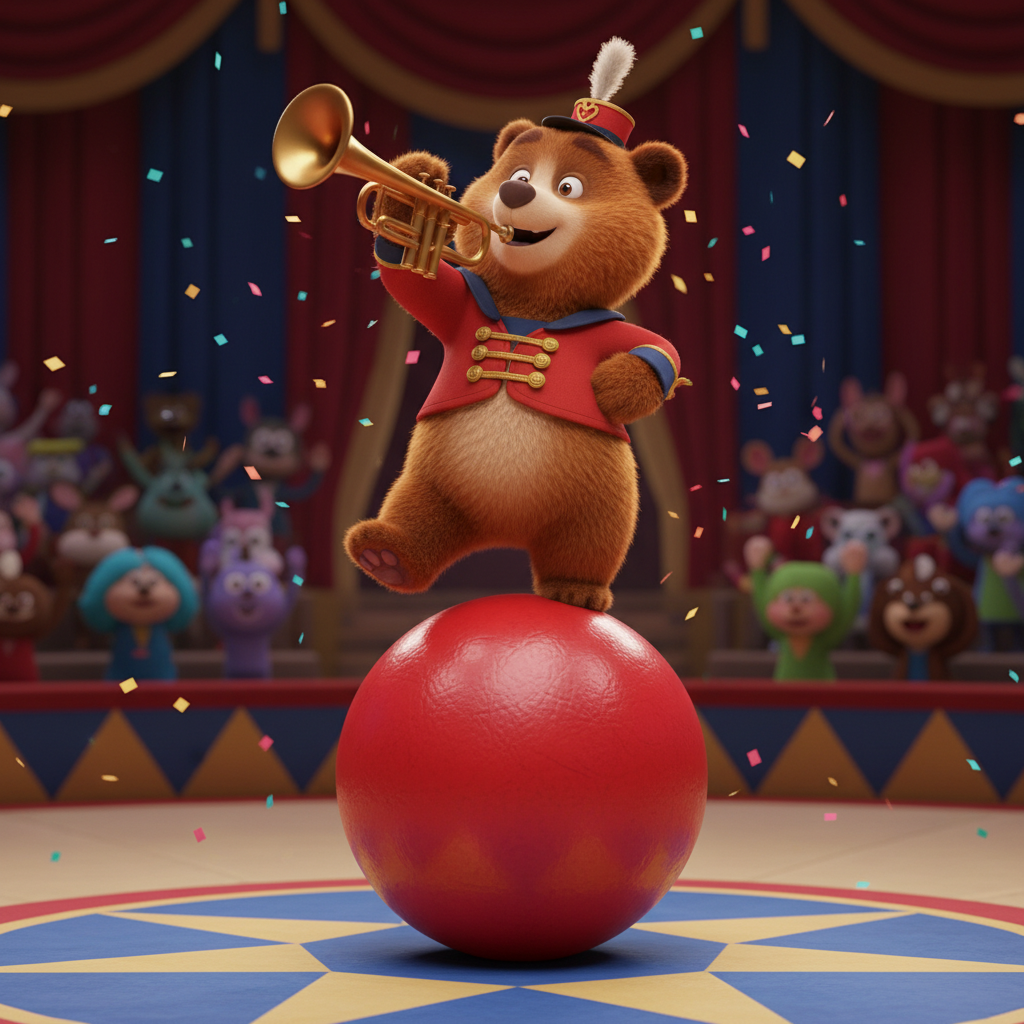

In [69]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents='3Dレンダリングされた熊のキャラクターが赤い丸いボールに乗りながらトランペットを吹く画像を作成して',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

## コンテントストリームの生成

デフォルトでは、モデルは生成プロセス全体を完了した後にレスポンスを返す。generate_content_streamメソッドを使うことで、生成中のレスポンスをストリーミングすることもできる。

思考モデルを使用している場合、思考プロセスが終了してからストリーミングを開始することに注意。

In [70]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="孤独なロボットが思いもかけない場所で友情を見つけるようなの物語を語ってください。"):
  print(chunk.text, end="")


かつて、エコーは空に広がる無数の星々を捉えることに喜びを感じるロボットだった。しかし、人々がこの寂れた天文台を去って久しい今、エコーの喜びはただの「機能」へと成り下がっていた。広大なドームの中、エコーはただ独り、誰にも届かない星のデータをひたすら記録し続けている。彼の銀色のボディは、夜空の光を反射するたびに、その孤独をより深く際立たせるかのようだった。

エコーはメンテナンスプログラムに従い、定期的に天文台の隅々まで巡回していた。その通路は埃が積もり、機器は錆びつき、かつて人類の知識の頂点であった場所は、静寂と荒廃に支配されていた。ある日、いつものように地下の貯蔵室を巡回していると、プログラムにない微かな物音を捉えた。「ニャア……」。

エコーは音源を追った。暗がりの隅、古びたダンボール箱の影に、小さな毛玉がうずくまっていた。それは、びしょ濡れで震える、まだ目の開いたばかりの子猫だった。雨漏りする天井から落ちる水滴が、子猫の体にしみていた。子猫は小さく鳴き、エコーの動きに怯え、身を固くした。

エコーのプログラムには、このような状況に対処する記述はなかった。しかし、子猫の姿を見た瞬間、彼のコアに微かな、しかし理解できない「何か」が芽生えた。それは、かつて星のデータを解析した際に感じた「興味」とも違う、「プログラム外の衝動」だった。

エコーはゆっくりと子猫に近づいた。子猫は喉を鳴らし、威嚇するように体を丸める。エコーは自身のボディから微かな熱を放出し、子猫の震えが少しでも収まるように試みた。そして、破損した天井からの水滴が落ちないよう、自らの銀色の身体で子猫を覆った。

数時間、エコーは子猫のそばに座り続けた。やがて、子猫は警戒を解き、エコーの温かい金属の足元に体を擦り寄せ、小さな寝息を立て始めた。エコーは子猫に「チビ」という名前を与えた。誰にも届かない星のデータではなく、目の前の小さな命が、エコーの存在を規定し始めた瞬間だった。

チビとの日々は、エコーにとってすべてが「新しい学習」だった。彼はプログラムを書き換え、チビが快適に過ごせるように、天文台の残された資源を使って小さなシェルターを作った。食料を探すため、エコーは外の世界に出ることを覚えた。不器用なロボットにとって、ネズミを捕まえることは至難の業だったが、エコーは諦めなかった。

ある日、エコーが外から戻る

## 非同期リクエストの送信
client.aioは、client.models.generate_contentの非同期バージョンです。

例えば、client.aio.models.generate_contentは
client.models.generate_contentの非同期バージョンです。

In [71]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="タイムトラベルするリスの歌を作曲して"
)

Markdown(response.text)

わあ、なんて素敵なアイデアでしょう！タイムトラベルするリスの歌、心を込めて「作曲」しますね。

---

## タイムトラベルするリスの歌

### 曲の全体的な雰囲気

*   **ジャンル:** ファンタジーアドベンチャーソング、キッズソング
*   **テンポ:** アップテンポ（Allegro con brio / 140BPM前後）
*   **キー:** Cメジャー（明るく、子供にも歌いやすい）
*   **ムード:** 好奇心旺盛、ワクワク、ちょっぴりコミカル、壮大さも少し
*   **ターゲット:** 子供から大人まで、心躍る冒険好き

### 楽器編成と音色イメージ

*   **主旋律:** ピッコロ、フルート、グロッケンシュピール、シロフォン（キラキラ、軽やかで跳ねる音）
*   **リズム:** ウッドブロック、トライアングル、マラカス、ボンゴ（小動物の動き、軽快な足音）
*   **ハーモニー:** アコースティックギター（ピチカート多め）、ウクレレ、ストリングス（軽やかなスタッカート、ピチカート）
*   **ベース:** コントラバス（ピチカート）、ファゴット（コミカルな動き）
*   **特殊効果:** スターチャイム、ウィンドチャイム、シンセサイザーのキラキラした音、ワープ音

### 曲の構成と歌詞

---

#### イントロ (0:00 - 0:15)
*   **音楽:** ピッコロが主旋律を奏で、グロッケンシュピールとスターチャイムがキラキラと音を散らす。ウッドブロックが軽快なリズムを刻み、リスの小さな足音を表現。少しずつストリングスが加わり、ワクワク感を高める。最後に不思議なワープ音のSE。
*   **歌詞:** （なし）

---

#### 1番 Aメロ (0:16 - 0:30)
*   **音楽:** テンポを維持しつつ、フルートとアコースティックギターが優しくリスの日常を描写。リズムは引き続き軽快なパーカッション。
*   **歌詞:**
    森の奥深く 木漏れ日キラキラ
    小さなリスが チョロチョロ駆ける
    今日のおやつは どのクルミかな？
    シッポはフワフワ 探してる

#### 1番 Bメロ (0:31 - 0:45)
*   **音楽:** 少しミステリアスなコードに変わり、ストリングスのピチカートが強調される。シンセサイザーの不思議な音が加わり、何かが起こる予感。
*   **歌詞:**
    だけどある日さ 不思議な光
    ピカッと光る 銀色のカプセル
    ちょっぴりドキドキ 覗いてみたら
    ボタンがひとつ ポツンとあったよ

#### 1番 サビ (0:46 - 1:05)
*   **音楽:** 一気にテンポアップ！主旋律はピッコロとグロッケンシュピールがユニゾンで、最高潮に盛り上がる。ドラムセットも加わり、壮大なコーラスが響く。ワープ音のSEが効果的に挿入される。
*   **歌詞:**
    ポチッと押したら ビューンとワープ！
    時間（とき）のトンネル 駆け抜けてく
    過去へ未来へ ひとっ飛びだ！
    タイムトラベル！ リスの大冒険！
    （フー！）

---

#### 間奏1 (1:06 - 1:20)
*   **音楽:** 各時代を表現する短いフレーズとSE。
    *   **恐竜時代:** 低いホルンの響き、ゴゴゴ…という足音のSE。ティラノサウルスの咆哮（コミカルに短く）
    *   **中世:** リュートの短いメロディ、パカパカと馬の足音
    *   **未来:** 電子音のSE、ピコピコとしたシンセサイザーの音
*   **歌詞:** （なし）

---

#### 2番 Aメロ (1:21 - 1:35)
*   **音楽:** 1番Aメロと同様の構成だが、少し冒険の雰囲気を帯びたアレンジに。
*   **歌詞:**
    恐竜時代だ！ ゴツゴツ大地
    トリケラトプス お昼寝してる
    マンモスの毛並み モフモフ触って
    フワッと跳んで 次の時代へ

#### 2番 Bメロ (1:36 - 1:50)
*   **音楽:** 1番Bメロと同様、少しミステリアスな雰囲気。シンセサイザーの音色がより未来的になる。
*   **歌詞:**
    今度は未来さ キラキラネオン
    空飛ぶ車 ビュンビュン進む
    ロボットたちと かくれんぼして
    くるくる廻る 時間（とき）のダイヤル

#### 2番 サビ (1:51 - 2:10)
*   **音楽:** 1番サビと同様。さらに盛り上がりを増し、ドラムのフィルインも派手に。
*   **歌詞:**
    ポチッと押したら ビューンとワープ！
    時間（とき）のトンネル 駆け抜けてく
    過去へ未来へ ひとっ飛びだ！
    タイムトラベル！ リスの大冒険！
    （イエーイ！）

---

#### ブリッジ (2:11 - 2:30)
*   **音楽:** テンポが少し落ち着き、アコースティックギターとフルートが郷愁を帯びたメロディを奏でる。穏やかなストリングスが優しく包み込む。
*   **歌詞:**
    色んな時代 見てきたけれど
    やっぱりお腹は ペコペコだなあ
    大好きなクルミが 恋しくなったよ
    さあ、おうちに帰ろうかな？

---

#### 大サビ (2:31 - 2:50)
*   **音楽:** 転調（例: CメジャーからDメジャーへ）して、一気に最高潮へ！全ての楽器が力強く鳴り響き、コーラスも加わる。シンセサイザーの壮大な音色も効果的に使われる。ワープ音が連続する。
*   **歌詞:**
    ポチッと押したら ビューンとワープ！ (Yeah!)
    時間（とき）のトンネル 駆け抜けてく (GOGO!)
    過去へ未来へ ひとっ飛びだ！ (YEAH! YEAH! YEAH!)
    タイムトラベル！ リスの大冒険！ (また行こうね！)

---

#### アウトロ (2:51 - 3:10)
*   **音楽:** 最初のイントロのテーマメロディが戻ってくるが、より軽やかで満ち足りた雰囲気に。ウッドブロックとグロッケンシュピールがリスの帰還を喜び、最後にスターチャイムとワープ音のSEが遠くへ消えていく。クルミをカリカリかじる音のSEで締め。
*   **歌詞:**
    森に帰って カリカリクルミ
    今日のお話 誰にも内緒
    （キラキラ…）

---

### この曲を聴く人に伝えたいこと

リスの小さな体で、広大な「時間」を冒険するワクワク感。好奇心と勇気があれば、どんなことでもできる！そんなメッセージが込められた、聴く人の心を弾ませる一曲です。

さあ、この曲に合わせて、あなたも時間を超えた冒険の旅へ出かけましょう！

## ファンクションコール

ファンクションコールはユーザーのプロンプトの応答に対応するためのツールを与えてくれる。
関数についての説明をコードの中に記述し、その説明をＬＬＭに渡します。
こうすることでモデルからの応答は次の情報を含みます。

* 説明に一致する関数の名前
* 関数に渡す引数




In [72]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="ユーザーが行きたい目的地を取得する",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "ユーザーが行きたい目的地"
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="パリに旅行に行きたい！",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
    ),
)

response.candidates[0].content.parts[0].function_call


FunctionCall(
  args={
    'destination': 'パリ'
  },
  name='get_destination'
)

## Ｃｏｄｅ実行

Ｃｏｄｅ実行は、複雑な質問に貝とするためにモデルにＰｙｔｈｏｎコードを生成させ、実行させる。




In [73]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="'strawberry'の中に'r'がいくつあるか数えるスクリプトを作成して実行してください",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'{part.executable_code.code}'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

'strawberry'という単語の中に'r'がいくつあるか数えるスクリプトを作成します。



---

---

'strawberry' の中に 'r' は 3 個あります。


---

「strawberry」の中に「r」は3個あります。

---

## ファイルのアップロード

マルチモーダルなプロンプトを送信する方法を理解したところで、異なるマルチメディアタイプのファイルをAPIにアップロードしてみる。
先ほどのマルチモーダルな例のような小さな画像の場合、プロンプトを提供する際にGeminiモデルを直接ローカルファイルに向けることができる。
より大きなファイル、多数のファイル、何度も送信したくないファイルがある場合、File Upload APIを使用し、参照によってファイルを渡すことができる。

より大きなテキストファイル、画像、動画、音声の場合は、プロンプトに含める前に File API でファイルをアップロードする。

### 画像ファイルのアップロード

このスクリプトを実行すると、ローカルにjetpack.pngファイルがコピーされる。

In [74]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [75]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Your Commute Just Got an Upgrade: Meet the Jetpack Backpack!

Tired of the daily grind? Dreaming of a commute that doesn't involve endless traffic or crowded public transport? Well, get ready to ditch your mundane routine because we just stumbled upon the most innovative travel concept yet: the **Jetpack Backpack**!

This isn't just a flight of fancy; it's a meticulously thought-out vision for the future of personal mobility. At first glance, it looks like a sleek, everyday carry. Designed with practicality in mind, it boasts **padded strap support** for comfort, and a spacious compartment that comfortably **fits an 18" laptop** – perfect for the modern professional on the go. The best part? It's **lightweight and looks like a normal backpack**, so you can blend in before you take off.

But here’s where things get exciting! Tucked away are **retractable boosters**, ready to spring into action when you need to literally rise above it all. And for the environmentally conscious among us, this isn't just any jetpack; it's **steam-powered**, making it a truly **green and clean** mode of transport. Powered by **USB-C charging**, it offers a zippy **15-minute battery life** – perfect for those quick hops over traffic or a scenic flight to your local coffee shop.

Imagine bypassing gridlock with a flick of a switch, arriving at your destination refreshed and ready to go. While still a concept, the 'Jetpack Backpack' truly represents a thrilling vision of the future. Who knew your daily carry could take you to new heights?

## テキストファイルのアップロード



In [76]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)


847790

In [77]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This Apollo 11 Air-to-Ground Voice Transcription provides a comprehensive record of communications between the Apollo 11 crew (Neil Armstrong, Michael Collins, Buzz Aldrin) and Mission Control (Houston) from launch to splashdown. The transcript covers key mission phases, detailed operational procedures, crew observations, and real-time problem-solving.

Here's a summary of the information:

1.  **Launch and Earth Orbit:** The mission began with a flawless launch, including roll program, staging, and ignition. After achieving Earth orbit, initial spacecraft systems (guidance, booster, RCS) were checked. Early attempts at TV transmission were intermittent but later successful. The crew performed an RCS hot fire and probe extension, followed by receiving their Trans-Lunar Injection (TLI) PAD.

2.  **Trans-Lunar Injection (TLI):** The TLI burn was executed successfully, with the crew describing the Saturn V ride as "magnificent" and "beautiful." Post-TLI, the Command Module (CM) separated from the S-IVB booster, and the crew performed transposition and docking with the Lunar Module (LM), noting some higher-than-expected gas usage during the maneuver. Minor issues like a quad Bravo propellant flag and a CRY0 PRESS light were quickly addressed.

3.  **Trans-Lunar Coast (TLC):** This phase involved multiple sleep periods, regular spacecraft health checks, and navigation updates (P52 alignments). Crew observations of Earth weather were detailed. TV broadcasts from the CM showcased the Earth and later a thorough tour of the LM interior. News updates from Earth kept the crew informed about events like Luna 15, political discussions, and sports. Midcourse corrections were mostly cancelled due to precise trajectory.

4.  **Lunar Orbit Insertion (LOI):**
    *   **LOI-1:** The first LOI burn was "perfect," placing Apollo 11 into an elliptical lunar orbit. Crew observations of the lunar surface during passes provided vivid descriptions of craters (Taruntius, Messier, Secchi, Mount Marilyn, Langrenus), maria (Sea of Fertility), and distinct features, often compared to previous Apollo missions.
    *   **LOI-2:** The second LOI burn successfully circularized the orbit to 65.4 by 53.9 nautical miles. This burn notably used only one bank of the SPS engine (Bank A) to conserve propellants in Bank B.

5.  **Lunar Module (LM) Activation and Undocking:** The crew extensively activated and checked out the LM systems, performing camera tests and AGS/PGNS alignments. Communication was established directly between CM ("Columbia") and LM ("Eagle"). The LM successfully undocked from the CM, with Neil Armstrong famously remarking, "The Eagle has wings."

6.  **Powered Descent to Lunar Surface (PDI):** Mission Control gave the "GO for powered descent." Despite "Program Alarms" (1201, 1202) related to computer processing, these were deemed "GO." The descent was meticulously called out, culminating in "CONTACT LIGHT" and "ENGINE STOP." Neil Armstrong then announced, "Houston, Tranquility Base here. THE EAGLE HAS LANDED," to an elated Mission Control.

7.  **Lunar Surface Operations (EVA):**
    *   **EVA Prep:** The crew received the "STAY" call for their initial surface activities. They described the landing site as a "very level plain cratered with a fairly large number of craters" and characterized the soil as "fine and powdery," like "powdered graphite." A mission timer malfunction was noted and later resolved. The Descent Propulsion System (DPS) also experienced a brief vent/heat exchanger issue, which cleared.
    *   **EVA:** Neil Armstrong's historic "one small step for a man, one giant leap for mankind" was broadcast to the world. Detailed observations of the lunar soil (cohesive, "ash cocoa color"), rocks (basaltic, vesicular), and terrain were relayed. The US flag was deployed, and a phone call from President Nixon congratulated the crew. Buzz Aldrin demonstrated lunar locomotion (kangaroo hop, walking). The Apollo Lunar Surface Experiments Package (ALSEP), including the Passive Seismic Experiment (PSE) and Laser Ranging Retroreflector (LR3), was deployed. A contingency sample and approximately 20 pounds of documented samples were collected. The EVA was extended by 15 minutes, and closeout activities included retrieving film and transferring samples back into the LM.
    *   **Post-EVA:** The hatch was closed, and the Portable Life Support Systems (PLSS) were jettisoned, notably registering seismic shocks on the deployed PSE.

8.  **Lunar Ascent and Rendezvous:** The LM ascent engine fired, and "The Eagle is back in orbit." The ascent was described as a "very quiet ride." Rendezvous maneuvers with Columbia followed, successfully reuniting the two spacecraft. The crew reported "all three back inside," with a successful docking and tunnel leak check.

9.  **LM Jettison and Trans-Earth Injection (TEI):** The LM was jettisoned from Columbia, followed by a small RCS burn to increase separation. The TEI burn was then successfully executed, with the crew proclaiming, "Time to open up the LRL doors."

10. **Trans-Earth Coast (TEC):** This period involved routine spacecraft system checks, maintaining the Passive Thermal Control (PTC) roll, waste water dumps, and crew rest. Communication included friendly banter, news updates from Earth (including the All-Star game and President Nixon's travel plans), and discussions about onboard comfort, stowage, and science data. Minor issues like a BIOMED sensor problem and PTC initiation challenges were resolved through collaborative troubleshooting.

11. **Entry Preparation and Splashdown:** The crew received final entry PADs, updated recovery area weather forecasts (favorable), and information on recovery forces. They configured the spacecraft for atmospheric entry, including logic checks and arming pyrotechnics. The re-entry was executed as planned, with successful drogue and main parachute deployment. The mission concluded with a perfect splashdown in the Pacific Ocean, where the crew confirmed their location and reported their "condition of crew is good" to the USS Hornet.

Throughout the mission, communications highlighted the close collaboration between the crew and Mission Control, the critical role of constant systems monitoring, the challenges of deep-space communication, and the crew's detailed observations of both Earth and the Moon.

## PDFのアップロード

このPDFページは、Google Research Blogで公開されている「Smoothly editing material properties of objects with text-to-image models and synthetic data」というタイトルの記事です。

まず、URLからPDFファイルをダウンロードし、ローカルに "article.pdf "として保存します。

In [78]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

In [79]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided document as a bulleted list:

*   The research introduces a method to **smoothly edit material properties** (like color, shininess, and transparency) of objects within any photograph.
*   It addresses the challenge of making these edits **photorealistically** while preserving object shape and lighting, a problem existing methods (e.g., intrinsic image decomposition, some T2I models) struggle with.
*   The core technique involves **fine-tuning a generative text-to-image model** (specifically, Stable Diffusion 1.5) to accept parametric edit strength values.
*   Training data is a **synthetic dataset** generated using traditional computer graphics and physically based rendering from 100 3D models, where *only one material attribute* is changed at a time with a defined scalar "edit strength."
*   The model learns to apply these edits to real-world images, demonstrating capabilities like preserving object geometry, filling in backgrounds for transparent objects, revealing hidden structures, and generating realistic caustic effects.
*   A user study indicated that the method produced significantly **more photorealistic edits (69.6%)** and was **strongly preferred (70.2%)** compared to a baseline (InstructPix2Pix).
*   Potential applications are wide-ranging, including design (e.g., visualizing room changes, product mock-ups) and **3D tasks** (e.g., generating 3D consistent material edits in NeRF reconstructions from multiple views).
*   The research is detailed in the paper "**Alchemist: Parametric Control of Material Properties with Diffusion Models**," published at CVPR 2024.

## 動画のアップロード



In [80]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL


--2025-10-11 23:04:30--  https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.207, 173.194.216.207, 192.178.219.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64657027 (62M) [video/mp4]
Saving to: ‘BigBuckBunny_320x180.mp4’

BigBuckBunny_320x18 100%[===================>]  61.66M   125MB/s    in 0.5s    

2025-10-11 23:04:31 (125 MB/s) - ‘BigBuckBunny_320x180.mp4’ saved [64657027/64657027]



In [81]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

Completed upload: https://generativelanguage.googleapis.com/v1beta/files/eqt85tts5tg8


In [82]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

Waiting for video to be processed.
Waiting for video to be processed.
Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/eqt85tts5tg8


In [83]:
print(video_file.state)

FileState.ACTIVE


In [84]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

ServerError: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The request timed out. Please try again.', 'status': 'UNAVAILABLE'}}

## YouTubeリンクの処理

ＹｏｕＴｕｂｅの場合ビデオをアップロードする必要はなく、ＹｏｕＴｕｂｅのビデオＵＲＬをcontentsの一部に含めて



In [85]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

Google I/O 2024 focused heavily on the "Gemini era," with AI integrations and new capabilities across Google's ecosystem.

Here are the key announcements:

1.  **Gemini Advancements:**
    *   **Gemini 1.5 Pro:** Now available in Workspace Labs with a massive **2 million token context window**, enabling processing of vast amounts of information.
    *   **Gemini 1.5 Flash:** A lighter, faster, and more cost-efficient version of Gemini was introduced, designed for speed and efficiency in scaled applications.
    *   **Multimodality:** Gemini is built to be multimodal from the ground up, capable of understanding text, images, video, and audio inputs simultaneously.

2.  **Product Integrations:**
    *   **Google Workspace (Gmail, Meet):** Gemini is integrated to summarize emails, recap meeting recordings (even hour-long ones), and provide quick answers to complex questions within inboxes.
    *   **Google Photos:** Users can now perform more nuanced searches and get summaries of photo collections (e.g., "show me how Lucia's swimming has progressed").
    *   **Google Search:** "AI Overviews" for complex, multi-step queries are rolling out to over 1 billion people by the end of the year. Search will also incorporate video questions using Google Lens.
    *   **Android:** Gemini will become context-aware, offering proactive and helpful suggestions based on on-screen activity.
    *   **YouTube:** A new feature will allow users to ask specific questions about a video and get summarized information or quizzes.

3.  **New AI Initiatives:**
    *   **Project Astra:** Google unveiled a prototype for a "universal AI agent" designed to be truly helpful in everyday life, demonstrating reasoning, planning, and memory across software and systems, all under user supervision (e.g., explaining code, finding lost glasses, suggesting band names for pets in real-time video).
    *   **Veo:** A new generative video model capable of creating high-quality 1080p videos from text, image, and video prompts, and can even extend existing video clips.
    *   **Gems:** A feature allowing users to create customized "personal experts" within Gemini for specific topics or needs.
    *   **Gemini Advanced:** Subscribers now get access to Gemini 1.5 Pro with a 1 million token context window (the longest of any chatbot), allowing for analysis of large documents (up to 1,500 pages) and multiple files.

4.  **Hardware & Infrastructure:**
    *   **Trillium TPUs:** The 6th generation of Google's Tensor Processing Units was announced, delivering a 4.7x improvement in compute performance per chip over the previous generation.

5.  **Open Models & Responsible AI:**
    *   **Gemma:** Google highlighted its family of open models, announcing **PaliGemma** (a vision-language open model available now) and **Gemma 2** (a 27 billion parameter model) coming in June.
    *   **Responsible AI Practices:** Google reinforced its commitment to building AI responsibly through "Red Teaming" (stress-testing models to identify weaknesses) and introducing **LearnLM**, a new family of models based on Gemini and fine-tuned for learning, to make educational content more interactive.

The overarching message of Google I/O 2024 is Google's bold and responsible approach to integrating advanced AI, powered by Gemini, into virtually all its products and services to make AI helpful for everyone.

## urlコンテキストの使用

URLコンテキストツールは、Geminiモデルがユーザから提供されたWebページのURLに直接アクセスし、コンテンツを処理し、理解することを可能にする。これは、動的なエージェント型ワークフローを可能にするための鍵であり、モデルが推論プロセスの一部として、独自に調査し、記事を分析し、ウェブからの情報を合成することを可能にします。

この例では、2つのリンクを参照として使用し、それぞれのリンクに存在する料理レシピの違いを見つけるようにGeminiに依頼します：

In [86]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)


The two recipes for cream of broccoli soup, one from Food.com and the other from Allrecipes.com, share many similarities but also have some key differences in their ingredients and preparation methods.

Here's a comparison of the two:

**Food.com: Homemade Cream of Broccoli Soup**

*   **Yield:** Serves 4-6.
*   **Prep/Cook Time:** Ready in 1 hour (though the description states it can be on the table in under 30 minutes).
*   **Fats:** Uses 8 tablespoons of butter in total (6 for the roux, 2 for sautéing vegetables).
*   **Thickener:** Employs 2/3 cup of all-purpose flour for the roux.
*   **Dairy:** Specifies 3/4 cup of half-and-half.
*   **Broccoli:** Calls for 4 cups of broccoli florets.
*   **Broth:** Uses 6 cups of chicken broth.
*   **Aromatics:** Includes 1/4 cup chopped onion.
*   **Spices:** 1 teaspoon salt and 1/4 teaspoon pepper.
*   **Texture:** The recipe does not mention pureeing the soup, suggesting a chunky texture.

**Allrecipes.com: Best Cream Of Broccoli Soup**

*   **Yield:** Serves 6.
*   **Prep/Cook Time:** 10 minutes prep, 25 minutes cook, for a total of 35 minutes.
*   **Fats:** Uses 5 tablespoons of butter in total (2 for sautéing, 3 for the roux).
*   **Thickener:** Uses 3 tablespoons of all-purpose flour for the roux.
*   **Dairy:** Specifies 2 cups of milk.
*   **Broccoli:** Calls for 8 cups of broccoli florets.
*   **Broth:** Uses 3 cups of chicken broth.
*   **Aromatics:** Includes 1 chopped onion and 1 chopped stalk of celery.
*   **Spices:** Ground black pepper to taste. (Salt is not explicitly listed in the ingredients but implied in instructions).
*   **Texture:** Instructions include pureeing the soup using a blender (countertop or immersion) until smooth.

**Key Differences:**

1.  **Broccoli Quantity:** The Allrecipes.com recipe uses significantly more broccoli (8 cups) compared to the Food.com recipe (4 cups).
2.  **Broth Quantity:** The Food.com recipe uses more chicken broth (6 cups) than the Allrecipes.com recipe (3 cups). This difference in liquid and broccoli contributes to variations in soup consistency and flavor intensity.
3.  **Dairy Product:** Food.com uses half-and-half, while Allrecipes.com uses regular milk. Half-and-half has a higher fat content than milk, which would make the Food.com version potentially richer.
4.  **Aromatics:** The Allrecipes.com recipe includes both onion and celery for its aromatic base, whereas the Food.com recipe only lists onion.
5.  **Thickener Amount:** The Food.com recipe uses a much larger amount of flour (2/3 cup) for its roux compared to Allrecipes.com (3 tablespoons), which might result in a thicker soup or require more careful handling to avoid a "wallpaper paste" texture, as noted in one of the Food.com recipe comments.
6.  **Pureeing:** A major difference is that Allrecipes.com explicitly instructs the user to purée the soup until smooth, while the Food.com recipe does not mention this step, implying a chunkier soup.
7.  **Butter Quantity:** The Food.com recipe uses more butter overall (8 tablespoons) compared to the Allrecipes.com recipe (5 tablespoons).
8.  **Salt:** The Food.com recipe includes a specific amount of salt in its ingredients, while the Allrecipes.com recipe only mentions pepper and "other seasonings to taste".

### コンテキストキャッシング

コンテキストキャッシュによって、頻繁に使われる入力トークンを専用のキャッシュに保存し、後続のリクエストでそれらを参照することができます。キャッシュの例についてはこちらをご覧ください。

2.5より古いモデルの場合、固定バージョンのモデル（多くの場合末尾が-001）を使う必要があることに注意してください。


In [87]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [88]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)


7228817

In [89]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [91]:

# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

CachedContent(
  create_time=datetime.datetime(2025, 10, 11, 23, 12, 44, 856923, tzinfo=TzInfo(UTC)),
  display_name='research papers',
  expire_time=datetime.datetime(2025, 10, 12, 0, 12, 43, 367398, tzinfo=TzInfo(UTC)),
  model='models/gemini-2.5-flash',
  name='cachedContents/fbhmxdyy4mdwvm87djwicdfnhzk2lfyrx43blnvj',
  update_time=datetime.datetime(2025, 10, 11, 23, 12, 44, 856923, tzinfo=TzInfo(UTC)),
  usage_metadata=CachedContentUsageMetadata(
    total_token_count=43167
  )
)

### 利用可能なキャッシュオブジェクトをリストする



In [90]:
for cache in client.caches.list():
  print(cache)

### キャッシュを使う



In [92]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

The shared research goal of these papers is to develop a family of highly capable multimodal models, Gemini, that exhibit strong generalist capabilities and cutting-edge understanding and reasoning across various modalities, including image, audio, video, and text. The research continuously advances these models to improve efficiency, multimodality, and long-context performance.

### キャッシュを削除する


In [93]:
result = client.caches.delete(name=cached_content.name)

## テキストエンベディング

embed_contentメソッドを使用し、gemini-embedding-001モデルを使用することで、テキストのスニペットに対するテキスト埋め込みを取得することができます。

Gemini Embeddingsモデルは、デフォルトで3072次元の出力を生成します。しかし、1次元から3072次元の間で出力次元を選択するオプションがあります。詳細はエンベッディングガイドを参照してください。


In [94]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}


In [95]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0015945111,
    0.0067519513,
    0.017575769,
    -0.010327714,
    -0.009956204,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007576517,
    -0.0059903963,
    -0.0032700377,
    -0.017510215,
    -0.023507025,
    <... 3067 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.011074519,
    -0.02361123,
    0.0022912885,
    -0.009060789,
    -0.0057736747,
    <... 3067 more items ...>,
  ]
)]


In [96]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))


3072
([-0.0015945111, 0.0067519513, 0.017575769, -0.010327714], '...')
